## Import Libraries and Load the Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('AB_NYC_2019.csv')

# Check the first few rows to understand the data structure
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Data Integrity Check

In [14]:
# Checking the data types and structure
df.info()

# Checking summary statistics for numeric columns to understand data distributions
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   name                            48858 non-null  object 
 2   host_id                         48858 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   48858 non-null  object 
 6   latitude                        48858 non-null  float64
 7   longitude                       48858 non-null  float64
 8   room_type                       48858 non-null  object 
 9   price                           48858 non-null  int64  
 10  minimum_nights                  48858 non-null  int64  
 11  number_of_reviews               48858 non-null  int64  
 12  last_review                     38821

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,1.239035,7.148369,112.801425
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,1.520889,32.964600,131.610962
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Missing Data Handling

In [18]:
# Dropping rows with missing 'name' and 'host_name'
df = df.dropna(subset=['name', 'host_name'])

# Imputing missing 'reviews_per_month' with the median value (without using inplace)
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].median())

# Checking for missing data again to ensure everything is handled
df.isnull().sum()


id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Duplicate Removal

In [20]:
# Checking for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Dropping duplicates
df = df.drop_duplicates()

# Confirming that duplicates have been removed
df.duplicated().sum()


Number of duplicate rows: 0


0

## Standardization

In [22]:
# Ensuring consistent column names format (lowercase and underscore format)
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Ensuring consistent formatting of categorical data
df['neighbourhood'] = df['neighbourhood'].str.title()

# Checking the updated column names and first few rows
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.72,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Outlier Detection and Handling

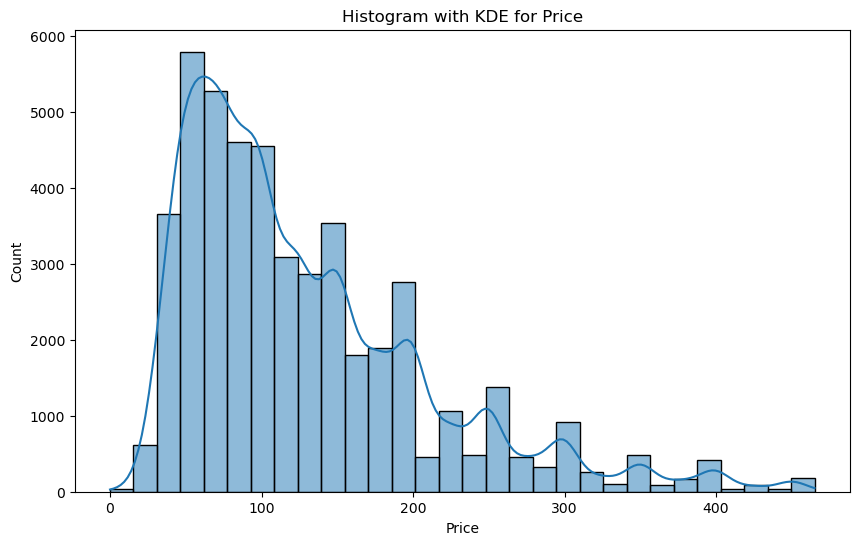

                 id       host_id      latitude     longitude         price  \
count  4.709500e+04  4.709500e+04  47095.000000  47095.000000  47095.000000   
mean   1.895834e+07  6.678888e+07     40.728724    -73.951293    126.404884   
std    1.094292e+07  7.794691e+07      0.054981      0.046290     78.165784   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.464340e+06  7.760956e+06     40.689640    -73.982340     67.000000   
50%    1.959602e+07  3.046794e+07     40.722320    -73.954870    100.000000   
75%    2.899070e+07  1.065458e+08     40.763340    -73.935040    165.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990    400.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    47095.000000        47095.00000       47095.000000   
mean         6.956174           23.67831           1.245678   
std         19.829545           44.99219           1.532256   
min          1.000000            0.0

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Histogram with KDE for Price')
plt.xlabel('Price')
plt.show()

# Calculate the 99th percentile
q99 = df['price'].quantile(0.99)

# Remove outliers by filtering prices above the 99th percentile
df = df[df['price'] <= q99]

# Check the dataset after removing outliers
print(df.describe())


## Saving the Cleaned Dataset

In [34]:
# Save the cleaned dataset to a new CSV file
df.to_csv('AB_NYC_2019_cleaned.csv', index=False)

print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!
